In [137]:
import numpy as np
import matplotlib.pyplot as plt
import fsps
import const
from scipy.ndimage import gaussian_filter
from scipy.integrate import trapz, cumtrapz
from functions import save_fig
import os


In [138]:
ssp = fsps.StellarPopulation(
    zcontinuous=1, 
    logzsol=np.log10(0.331), 
    sfh=0, 
    imf_type=1, 
    dust_type=2, 
    dust2=0.2, 
    add_agb_dust_model=True,
    add_dust_emission=True,
    add_neb_emission=True,
    nebemlineinspec=True
)


In [139]:
time = 10**ssp.log_age*const.yr
cond = time < 30*const.Myr

def calc_resp(L):
    ''' Compute the response function from the luminosity. '''
    return L / trapz(L, time)


In [140]:
lamb, spec = ssp.get_spectrum()
lamb = lamb*const.AA
nu = const.c/lamb
spec = spec

idx_Lyalpha = np.argmin(np.abs(ssp.emline_wavelengths - 1215.67))
idx_OIII1 = np.argmin(np.abs(ssp.emline_wavelengths - 4960.3702))
idx_OIII2 = np.argmin(np.abs(ssp.emline_wavelengths - 5008.3137))
idx_Halpha = np.argmin(np.abs(ssp.emline_wavelengths - 6564.7229))
idx_Hbeta = np.argmin(np.abs(ssp.emline_wavelengths - 4862.7629))


In [141]:
mag_f200w, mag_f277w = ssp.get_mags(redshift=9, bands=['jwst_f200w', 'jwst_f277w']).T
resp_f200w = calc_resp(10**(-mag_f200w / 2.5))
resp_f277w = calc_resp(10**(-mag_f277w / 2.5))

mag_f200w, mag_f277w = ssp.get_mags(redshift=19, bands=['jwst_f200w', 'jwst_f277w']).T
resp_f200w_z19 = calc_resp(10**(-mag_f200w / 2.5))
resp_f277w_z19 = calc_resp(10**(-mag_f277w / 2.5))

resp_Lyalpha = calc_resp(ssp.emline_luminosity[:, idx_Lyalpha])
resp_OIII1 = calc_resp(ssp.emline_luminosity[:, idx_OIII1])
resp_OIII2 = calc_resp(ssp.emline_luminosity[:, idx_OIII2])
resp_Halpha = calc_resp(ssp.emline_luminosity[:, idx_Halpha])
resp_Hbeta = calc_resp(ssp.emline_luminosity[:, idx_Hbeta])

fsigma = 0.02*const.Myr
resp_f200w_sm = gaussian_filter(resp_f200w, sigma=(fsigma / np.diff(time)[0]))
resp_f277w_sm = gaussian_filter(resp_f277w, sigma=(fsigma / np.diff(time)[0]))
resp_f200w_z19_sm = gaussian_filter(resp_f200w_z19, sigma=(fsigma / np.diff(time)[0]))
resp_f277w_z19_sm = gaussian_filter(resp_f277w_z19, sigma=(fsigma / np.diff(time)[0]))
resp_Halpha_sm = gaussian_filter(resp_Halpha, sigma=(fsigma / np.diff(time)[0]))
resp_OIII1_sm = gaussian_filter(resp_OIII1, sigma=(fsigma / np.diff(time)[0]))



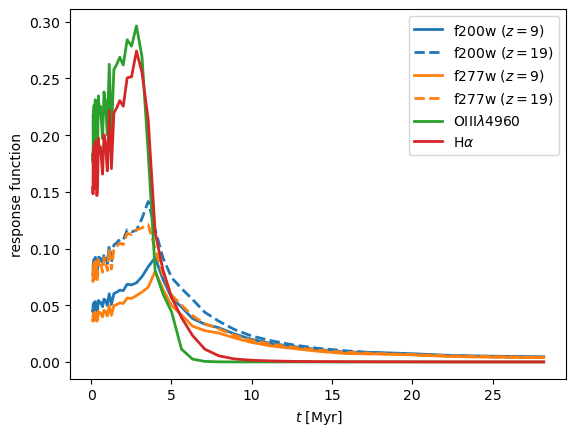

In [131]:
plt.plot(time[cond]/const.Myr, resp_f200w[cond]*const.Myr, lw=2, label=r'f200w ($z=9$)', color='C0')
plt.plot(time[cond]/const.Myr, resp_f200w_z19[cond]*const.Myr, lw=2, label=r'f200w ($z=19$)', color='C0', linestyle='--')
plt.plot(time[cond]/const.Myr, resp_f277w[cond]*const.Myr, lw=2, label=r'f277w ($z=9$)', color='C1')
plt.plot(time[cond]/const.Myr, resp_f277w_z19[cond]*const.Myr, lw=2, label=r'f277w ($z=19$)', color='C1', linestyle='--')
plt.plot(time[cond]/const.Myr, resp_OIII1[cond]*const.Myr, lw=2, label=r'OIII$\lambda$4960', color='C2')
plt.plot(time[cond]/const.Myr, resp_Halpha[cond]*const.Myr, lw=2, label=r'H$\alpha$', color='C3')

plt.xlabel(r'$t$ [Myr]')
plt.ylabel('response function')
plt.legend()


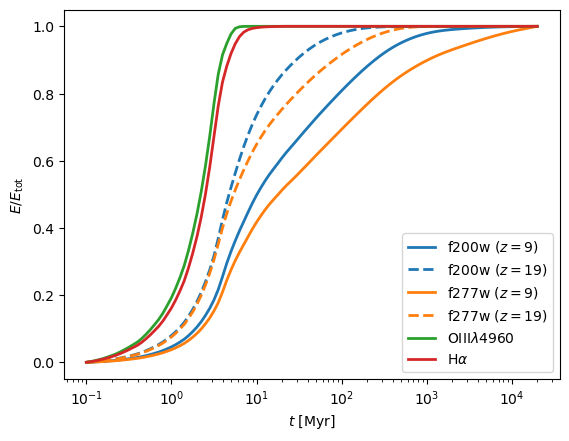

In [132]:
plt.plot(time/const.Myr, cumtrapz(resp_f200w, time, initial=0), lw=2, label=r'f200w ($z=9$)', color='C0')
plt.plot(time/const.Myr, cumtrapz(resp_f200w_z19, time, initial=0), lw=2, label=r'f200w ($z=19$)', color='C0', linestyle='--')
plt.plot(time/const.Myr, cumtrapz(resp_f277w, time, initial=0), lw=2, label=r'f277w ($z=9$)', color='C1')
plt.plot(time/const.Myr, cumtrapz(resp_f277w_z19, time, initial=0), lw=2, label=r'f277w ($z=19$)', color='C1', linestyle='--')
plt.plot(time/const.Myr, cumtrapz(resp_OIII1, time, initial=0), lw=2, label=r'OIII$\lambda$4960', color='C2')
plt.plot(time/const.Myr, cumtrapz(resp_Halpha, time, initial=0), lw=2, label=r'H$\alpha$', color='C3')

plt.xlabel(r'$t$ [Myr]')
plt.ylabel(r'$E/E_{\rm tot}$')
plt.xscale('log')
plt.legend()


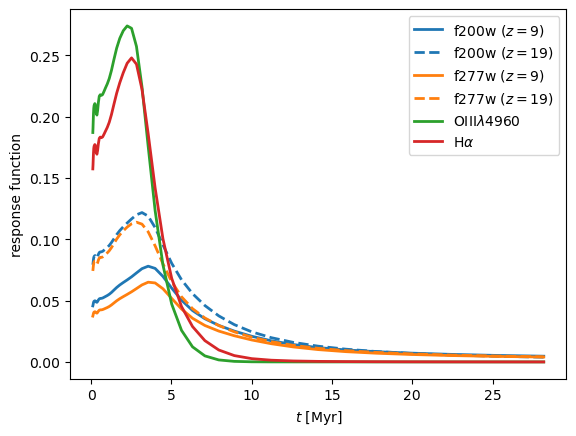

In [133]:
plt.plot(time[cond]/const.Myr, resp_f200w_sm[cond]*const.Myr, lw=2, label=r'f200w ($z=9$)', color='C0')
plt.plot(time[cond]/const.Myr, resp_f200w_z19_sm[cond]*const.Myr, lw=2, label=r'f200w ($z=19$)', color='C0', linestyle='--')
plt.plot(time[cond]/const.Myr, resp_f277w_sm[cond]*const.Myr, lw=2, label=r'f277w ($z=9$)', color='C1')
plt.plot(time[cond]/const.Myr, resp_f277w_z19_sm[cond]*const.Myr, lw=2, label=r'f277w ($z=19$)', color='C1', linestyle='--')
plt.plot(time[cond]/const.Myr, resp_OIII1_sm[cond]*const.Myr, lw=2, label=r'OIII$\lambda$4960', color='C2')
plt.plot(time[cond]/const.Myr, resp_Halpha_sm[cond]*const.Myr, lw=2, label=r'H$\alpha$', color='C3')

plt.xlabel(r'$t$ [Myr]')
plt.ylabel('response function')
plt.legend()

# save_fig('response_function_sm')


In [136]:
np.savez('resp_func.npz', time=time, f200w=resp_f200w, f277w=resp_f277w, Halpha=resp_Halpha, OIII=resp_OIII1)
